In [28]:
# Gabriel Nilsson

# Function that returns new matrix with normalized columns
def normalize_cols(A):
    M = matrix.identity(QQ, A.ncols())
    for i in range(len(A.columns())):
        col_sum = sum(A[:,i])
        M[:,i] = vector(QQ, [val/col_sum for val in A[:,i]])
    return M

In [29]:
# Matrices collected during the data collection
A1 = matrix(RR, [[15,4,0,0,6],
                 [ 2,4,0,2,0],
                 [ 1,0,2,0,1],
                 [ 2,0,0,1,0],
                 [ 4,0,1,0,6]]).transpose()

A2 = matrix(RR, [[16,5,1,2,3],
                 [ 4,2,2,0,1],
                 [ 0,0,2,1,0],
                 [ 0,4,0,0,3],
                 [ 4,0,1,2,2]]).transpose()

A3 = matrix(RR, [[21,0,1,2,3],
                 [ 4,5,0,0,0],
                 [ 3,0,3,0,2],
                 [ 0,2,0,5,0],
                 [ 3,0,0,0,4]]).transpose()

#Average Matrix of the sample matrices
Av = A1+A2+A3/3

# Normalizing the columns of the Average Matrix
M = normalize_cols(Av)

#Printing The Average Matrix from the 3 data collections and the Markov Matrix
print(Av.n(digits=3), end='\n\n')
print(M.n(digits=3), end='\n\n')

print(sum(sum(A1)))
print(sum(sum(A2)))
print(sum(sum(A3)))

[ 38.0  7.33  2.00  2.00  9.00]
[ 9.00  7.67 0.000  4.67 0.000]
[ 1.33  2.00  5.00 0.000  2.00]
[ 2.67  2.00  1.00  2.67  2.00]
[ 10.0  1.00  1.67  3.00  9.33]

[ 0.623  0.367  0.207  0.162  0.403]
[ 0.148  0.383  0.000  0.378  0.000]
[0.0219  0.100  0.517  0.000 0.0896]
[0.0437  0.100  0.103  0.216 0.0896]
[ 0.164 0.0500  0.172  0.243  0.418]

51.0000000000000
55.0000000000000
58.0000000000000


In [30]:
# Function to print the eigenvalues and eigenvectors of the Markov Matrix generated in the last code cell.
def print_eigenstuff(A):
    for eigenstuff in A.eigenvectors_right():
        print("Eigenvalue:", eigenstuff[0])
        print("Eigenvector:", eigenstuff[1][0])
    print()

# Calling the function to print the eigenvalues and eigenvectors of the Markov Matrix = M
print_eigenstuff(M)

Eigenvalue: 0.04204105347057670?
Eigenvector: (1, -1.122663369234008?, 0.3505465589855885?, 0.6226977297368335?, -0.850580919488415?)
Eigenvalue: 0.2600164445417738?
Eigenvector: (1, -0.17537152267305?, 0.236924947930264?, -0.3327745987693930?, -0.72877882648783?)
Eigenvalue: 0.3944827912302907?
Eigenvector: (1, 101.5920869561847?, -22.90390375872838?, 2.603625811806571?, -82.29180900926284?)
Eigenvalue: 0.4611119070505784?
Eigenvector: (1, 1.15156185386907?, -1.25489648784834?, -0.153217383387221?, -0.74344798263351?)
Eigenvalue: 0.9999999999999999?
Eigenvector: (1, 0.3481089912217?, 0.19991109458428?, 0.177405030209370?, 0.4448797952328?)



In [31]:
# Function to calculate the Stationary Vector from the Markov Matrix
def stationary_vector(A):
    for eigenstuff in A.eigenvectors_right():
        if abs(eigenstuff[0] - 1) < .0001:
            return eigenstuff[1][0]

print("Stationary vector:", stationary_vector(M))


Stationary vector: (1, 0.3481089912217?, 0.19991109458428?, 0.177405030209370?, 0.4448797952328?)


(0.461, 0.160, 0.0921, 0.0817, 0.205)


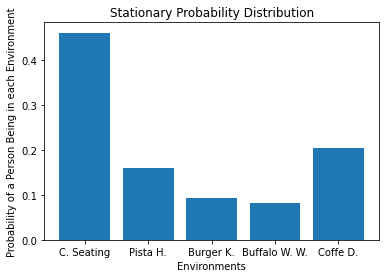



Using distribution (0.500, 0.250, 0.125, 0.125, 0.000)

After 0 time-steps we have: (0.500, 0.250, 0.125, 0.125, 0.000)
After 2 time-steps we have: (0.453, 0.182, 0.0966, 0.0836, 0.184)
After 4 time-steps we have: (0.459, 0.163, 0.0934, 0.0821, 0.202)
After 6 time-steps we have: (0.460, 0.161, 0.0925, 0.0818, 0.205)
After 8 time-steps we have: (0.461, 0.160, 0.0922, 0.0818, 0.205)
After 10 time-steps we have: (0.461, 0.160, 0.0921, 0.0817, 0.205)
After 12 time-steps we have: (0.461, 0.160, 0.0921, 0.0817, 0.205)
After 14 time-steps we have: (0.461, 0.160, 0.0921, 0.0817, 0.205)
After 16 time-steps we have: (0.461, 0.160, 0.0921, 0.0817, 0.205)


Using distribution (0.000, 0.000, 1.00, 0.000, 0.000)

After 0 time-steps we have: (0.000, 0.000, 1.00, 0.000, 0.000)
After 2 time-steps we have: (0.322, 0.0697, 0.288, 0.100, 0.220)
After 4 time-steps we have: (0.427, 0.136, 0.134, 0.0870, 0.216)
After 6 time-steps we have: (0.453, 0.154, 0.101, 0.0829, 0.208)
After 8 time-steps we have: (0.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Defining 3 different initial distributions
init_dist1 = vector([0.5,0.25,0.125,0.125,0])
init_dist2 = vector([0,0,1,0,0])
init_dist3 = vector([0.2,0.2,0.2,0.2,0.2])

initial_distributions = [init_dist1, init_dist2, init_dist3]

# Funtion to Potentialize M (Markov Matrix) to n with the 3 different initial distributions until the Stationary Vector calculated before is achieved.
def limit_pattern(M, init_dists):

    stat_vec = stationary_vector(M)
    # Turning the Stationary Vector into a probability distribution (Normalizing)
    norm_stat_vec = np.array(stat_vec)/sum(stat_vec)

    print(vector(RR, norm_stat_vec).n(digits=3))

    environmets = ['C. Seating', 'Pista H.', 'Burger K.', 'Buffalo W. W.', 'Coffe D.']
    plt.title('Stationary Probability Distribution')
    plt.bar(environmets, norm_stat_vec)
    plt.ylabel('Probability of a Person Being in each Environment')
    plt.xlabel('Environments')
    plt.show()

    for dist in init_dists:
        old_dist = dist
        print(f"\n\nUsing the initial distribution {dist.n(digits=3)}\n")
        for i in range(17):
            if i % 2 == 0:
                print(f"After {i} time-steps we have: {old_dist.n(digits=3)}")
            new_dist = M*old_dist
            old_dist = new_dist

    print('\n\n\n\n')
    
for M in [M]:
    limit_pattern(M, initial_distributions)